# Job Description Word Cloud#



In this notebook I generate a word cloud from descriptions and requirements of various data related job postings. The idea is the word cloud will clue me in on commonly occuring skills and attributes required for data related positions, allowing me to hone in my job search.

### Imports ###

In [1]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

### Building the Dataframe of Jobs

Jobs and their descriptions were gathered from Indeed. To format the descriptions/qualifications strings correctly I simply copy pasted them into a text editor and manually deleted line breaks.

In [2]:
companies = ['Wheelhouse DMG', 'Reddit', 'BlueGranite', 'Opanga Networks', 'The Mom Project', 'PickleballCentral', 'PCS GLOBAL TECH' ,'Glassdoor', 'Landis+Gyr']
job_titles = ['Junior Data Engineer', 'Data Warehouse Engineer', 'Data Engineer', 'Data Scientist', 'Data Scientist', 'Data Analyst and Systems Support Specialist', 'Data Analyst Entry Level', 'Data Analyst', 'Data Analyst I']
locations = ['Seattle, WA', 'Seattle, WA', 'Seattle, WA', 'Seattle, WA', 'Redmond, WA', 'Kent, WA', 'Seattle, WA', 'Seattle, WA', 'Kirkland, WA']
descriptions_qualifications = ["You will play a key role in defining, building, maintaining, and operating integrations, reporting pipelines, and data transformation systems. As a crucial member of the Data Science practice, you will interface with analysts, strategists, and engineers to collect and deliver high-quality, analytics ready data. You will regularly deliver value by problem-solving, improving data-intensive processes, and building connections between systems. From project work to ad hoc issue troubleshooting and resolution, this role requires critical thinking, organization, time management, and strong interpersonal skills. Perform transformation, documentation, and testing of data flows within our data warehouse. Collaborate with analysts to translate business requirements into data models using DBT. Work with Sr. Data Engineer to develop and maintain EL pipelines for marketing data sources for our proprietary data warehouse product Provide on-demand support for issues through troubleshooting, issue identification, resolution, and reporting Monitor data infrastructure for anomalies and support rapid resolution for mission-critical reporting Passion for data & a deep desire to learn Education, Personal or Early Career Experience in data engineering development A strong understanding of SQL for querying data and developing tables/views/architecture (Redshift or Postgres experience preferred) Intermediate Python for data processing (Numpy, Pandas, etc) Experience or understanding of ETL/ELT, data processing, and data preparation (Python preferred) Strong git and documentation practices DBT and/or Airflow experience Experience with data & information architecture (AWS experience preferred) API development & reverse engineering",
                              "You will be exposed to the full lifecycle of data at Reddit, and as a result will gain expertise on how to scale and improve the data culture across the entire company You will work directly with a diverse team set including data science, experimentation, infrastructure, machine learning, and senior leadership You will work with one of the largest and richest datasets in the world, and get exposure to leading data technologies (including the ones Reddit builds from the ground up) What You'll Do: Build and scale data orchestration services that support complex analysis across Reddit Consistently evolve data model & data schema based on business and engineering requirements Own data quality for crucial systems at Reddit, and serve as a primary resource for data expertise Define and manage SLA for datasets that support production services Who You Might Be: 3+ years experience in the data warehouse space 3+ years experience working with large scale ETL systems (implementation, strategy, and maintenance) 3+ years of experience building clean, maintainable, and well-tested code Fluent in Python and SQL Excellent communication skills to collaborate with stakeholders at all levels of the company Bonus points for background in data science, analytics, or data QA",
                              "Experience - 5-15+ years professional, project-based experience with data warehouses, data lakes, and pipelines Technologies - background with Microsoft Azure services and tools including Data Factory, Synapse, Databricks, and Purview Capabilities - strong aptitude for data and analytics - SQL queries, ETL frameworks and tools, T-SQL, python, and Spark Passion - interest in big data, small data, streaming data, batch data, and semantic data for BI/AI solutions Solutions - experience deploying data pipelines, models, and AI-driven solutions for clients in various industries Teamwork - ability to collaborate closely with team members and client stakeholders to ensure solutions align to outcomes Growth Mindset - commitment to continuously upgrading your technical skills as the data landscape changes Education - degree in information technology, computer science, business, engineering, or related field",
                              "Collaborate with product management and engineering departments to understand company needs and devise possible solutions Data mining using state-of-the-art methods Enhancing data collection procedures to include information that is relevant for building analytic systems Processing, cleansing, and verifying the integrity of data used for analysis Doing ad-hoc analysis and presenting results in a clear manner Implement new statistical or other mathematical methodologies as needed for specific models or analysis Optimize joint development efforts through appropriate database use and project design Requirements BA/BS degree in in Computer Science, Statistics, Applied Math or related field Experience with common data science toolkits, such as R, Weka, NumPy, MatLab. Excellence in at least one of these is highly desirable Great communication skills Experience with data visualization tools, such as D3.js, GGplot, Tableau, etc. Proficiency in using query languages such as SQL Experience with databases, such as Postgres and Elasticsearch Good applied statistics skills, such as distributions, statistical testing, regression, etc. Good scripting and programming skills in Python/Java Data-oriented personality",
                              "Examine data and produce meaningful insights from 3D geometry data. Perform exploratory data analysis and identify any problems or errors in the data. Plan for and execute statistical analysis for a large and growing data set (N=3000+ people, potentially hundreds of data points per person) Create code (in C++, Python, R, or equivalent) for data analysis Work with science staff to translate research questions to analysis tools and results. Work with database engineer to understand how to pull data from an existing database Work with their superiors to demonstrate what they have learned from their data and how it can be applied in the future for their business. Use a variety of sources to research and analyze topics, becoming an expert in a field. Present results in written and oral formats. On-demand consultation for analysis of smaller studies Must-Haves: Experience with 3D geometry analysis and 3D graphics (i.e. can do PCA on meshes). Experience with computer vision problems is helpful. Demonstrated experience with multivariate analysis approaches, principal components analysis, independent components analysis, hierarchical regression modeling, non-linear regression and modeling, machine learning approaches. Prior experience with Python, R, Matlab, or equivalent for large data sets. Understanding large database infrastructure (SQL) is an asset. Education: MA or Ph.D. in computer science, mechanical engineering, statistics, mathematics",
                              "This individual elicits and analyzes business needs for complex projects, determines the impact and integration of solutions to business processes and systems, and validates that solutions fit within the team’s capabilities and the department and organizations strategic vision. They collaborate with organizational stakeholders and senior management to establish and implement processes that enhance efficiency and improve work products for the enterprise. Additionally, the individual will work with internal stakeholders to build and/or pull performance, product, and sales reports to help identify opportunities across departments and channels We are looking for independent, motived, sytems thinker who can examine the entire process and ecosystem to identify, ideate, and provide solutions on improvements, changes and efficiencies. Duties and Responsibilities: Analyze current and technical processes to formulate and develop new and modified information processing systems. Collaborate with internal business units and stakeholders to help design, document, maintain and improve related business processes. Proactively build and deliver product and sales analysis to better inform strategic business decisions Maintain and improve data sources Work with team members to identify opportunities for improvement around Business functions including accounting and product management, warehouse operations, marketing? Customer data Product data Inventory data Develop deep knowledge of our e-commerce, marketing, and ERP systems and data Investigate and resolve data issues Propose, design and implement solutions at the intersection of business and technology Collaborate with team members to collect and analyze data Use graphs, infographics, and other methods to visualize data Establish new KPIs or improve existing KPIs to measure the effectiveness of business decisions Structure large data sets to find usable information Provide tactical organizational recommendations for process and improvement Interact with business customers (internal and external) to understand and document their business processes and requirements Provides day to day support for assigned systems. Qualifications: Bachelor’s degree in MIS, Computer Science or related field. 5+ years experience as a Business Systems Analyst · Working knowledge including, but not limited to, Big Commerce, Sku Vault, Volusion, Microsoft Office suite, and Glew (or other similar enterprise business intelligence software)",
                              "Training and encouraging staff to maintain complete databases that can be used for subsequent analysis. Gathering raw data from pertinent individuals in each department. Collating such data to facilitate its interpretation. Checking and cleaning data, taking special care to replace erroneous values with correct figures. Analyzing data, with due consideration for the influence of missing information, outliers, plus confounding and extraneous variables. Reporting on insights obtained, which might be utilized to inform business strategies. Consulting on areas of uncertainty to promote optimal use of ideas derived from data. Creating and updating data sets that evolve in tandem with our business's needs. Reporting Analyst Requirements: Degree in management information systems, statistics, or similar. 1 to 3 years of experience Knowledge of suitable data analytic processes. Proven experience creating data-driven knowledge that promotes profitability. Capacity to train staff in foundational data entry techniques. Ability to create, update, and share databases. Strong troubleshooting and report writing abilities. Attentive and considerate team player.",
                              "We're looking for a dedicated and inquisitive Data Analyst to help us with data projects. We are responsible for building and maintaining a large data set that powers integration points between us and partnered companies. This individual will be critical in helping to build and maintain coverage, identify data quality issues, reconcile and resolve data validation issues, and respond to internal data mapping requests from other customers, staff and partners. Structure large data sets to find usable information Use graphs, infographics and other methods to visualize data Establish critical metrics to measure the effectiveness of business decisions Create reports for internal teams and/or external clients Collaborate with team members near and offshore to collect and analyze data Work with leadership to find opportunities for improvement Work with a team of analysts and other associates to process information Create presentations and reports based on recommendations and findings Specific Hiring Characteristics/Targets Analytical and problem-solving skills Knowledge of data gathering, cleaning and transforming techniques Using Jira to manage work you're doing Proficiency in Microsoft Excel Ability to set and meet deadlines Technical writing skills Superb attention to detail Good written/verbal communication skills Ability to QA and solve data A commitment to add to our culture of DEI 1-2 years of relevant work experience coding in languages such as SQL, Python and/or R BS/BA or equivalent degree with an emphasis in Engineering, Mathematics, Economics, Statistics, Finance, Business Data Analyst, Accounting, related fields of expertise Programming experience and beginning to medium level familiarity with SQL Reporting and data visualization skills using software like Tableau Demonstrated understanding in data/information quality principles and practices. Knowledgeable in database development cycle including requirements gathering, modeling, coding, and testing. Ability to work in teams and to manage completion of multiple tasks within specified timeframes. Good analytical skills with the ability to distill, structure, and draw insight from large amounts of data. Strong organizational and communication skills Good level of familiarity with Excel and other Microsoft products", 
                              "A Data Analyst I provides direct customer operational support to include but not limited to database accuracy and predictive data analysis. Responsible for monitoring daily database processes in interest of that data accuracy. Also includes managing data down to the meter level as the situation dictates. Coordinates with other Data Analysts and the Cloud Services Center for management and escalation of issues as required by each case.  Key Responsibilities: Author basic database queries to monitor data, create informational and billing reports, etc. Work closely with all Program Office teammates to ensure all Service Level Agreements (SLA) are met. Maintain adequate familiarity with software and tools presently used by the given customer and the Program Office (such as Command Center) to ensure proactively analyze potential problem areas and escalate when necessary Be familiar with Change Management processes, tools and those involved in the processes to get any required changes accomplished. Develop and provide data reports to meet customer requirements. Supports and adheres to Company’s core values. Works independently 75% of the time Performs other duties or responsibilities as assigned or required. Supports and adheres to Company’s Code of Conduct and Ethics Policy. Represents Company in a positive, professional manner when working with both internal and external customers.  Education & Experience: Desired Minimum Level of Education: Bachelor’s degree Required Minimum Years of Experience: 1+ to 2  Desired Certifications: 1-3 years of related experience is preferred (data analysis, writing ad-hoc queries and customer support)"]


jobs = {'Job_title': job_titles,
       'Location': locations,
       'Words': descriptions_qualifications}

In [3]:
df = pd.DataFrame(data = jobs, index = companies)
df

,Job_title,Location,Words
Wheelhouse DMG,Junior Data Engineer,"Seattle, WA","You will play a key role in defining, building..."
Reddit,Data Warehouse Engineer,"Seattle, WA",You will be exposed to the full lifecycle of d...
BlueGranite,Data Engineer,"Seattle, WA","Experience - 5-15+ years professional, project..."
Opanga Networks,Data Scientist,"Seattle, WA",Collaborate with product management and engine...
The Mom Project,Data Scientist,"Redmond, WA",Examine data and produce meaningful insights f...
PickleballCentral,Data Analyst and Systems Support Specialist,"Kent, WA",This individual elicits and analyzes business ...
PCS GLOBAL TECH,Data Analyst Entry Level,"Seattle, WA",Training and encouraging staff to maintain com...
Glassdoor,Data Analyst,"Seattle, WA",We're looking for a dedicated and inquisitive ...
Landis+Gyr,Data Analyst I,"Kirkland, WA",A Data Analyst I provides direct customer oper...


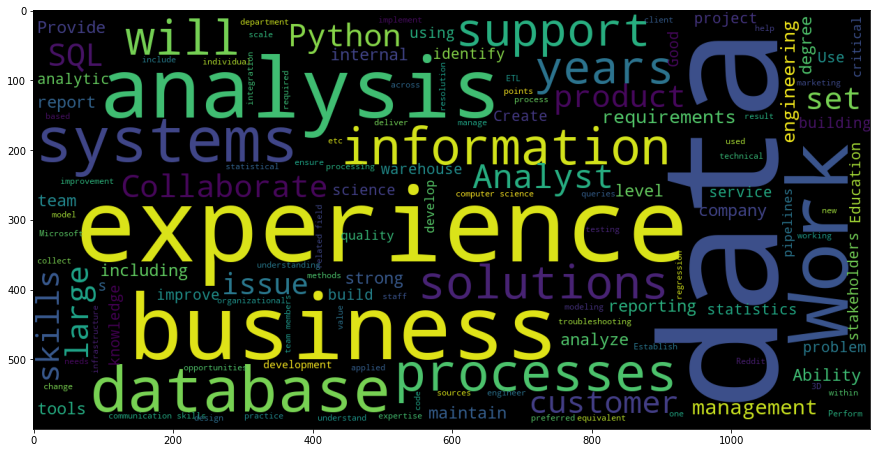

In [8]:
# Seperate all the job description strings into an array of strings
text = df['Words'].to_numpy()

# Build one large string out of all the job descriptions
full_text = ''
for description in text:
    full_text = full_text + ' ' + description

# Create the word cloud object
wordcloud = WordCloud(scale = 3).generate(full_text)

# Visualize the word cloud
plt.figure(figsize = [15,15])
plt.imshow(wordcloud)
plt.show()

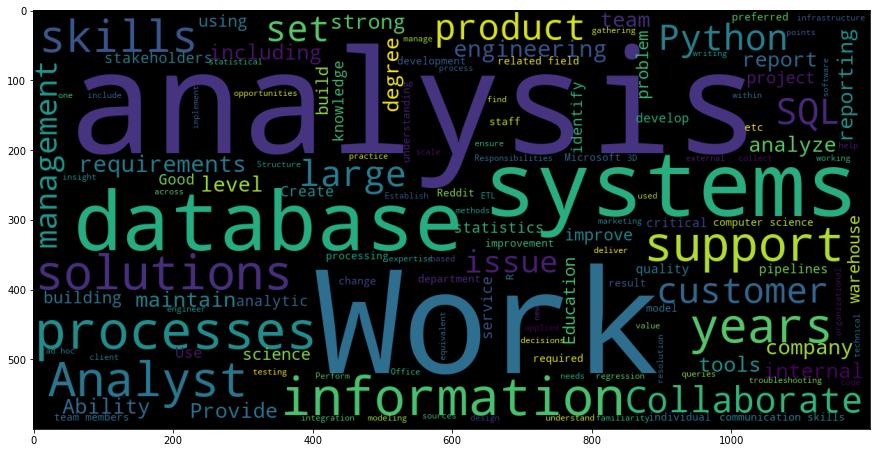

In [28]:
# Let's try that again with some other stop words added. Words like data and experience don't help us narrow things down
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
redundant_words = list(stops)
redundant_words.extend(['experience', 'data', 'business']) 

# Create the word cloud object
wordcloud = WordCloud(relative_scaling = 0.9, scale = 3, stopwords = redundant_words).generate(full_text)

# Visualize the word cloud
plt.figure(figsize = [15,15])
plt.imshow(wordcloud)
plt.show()

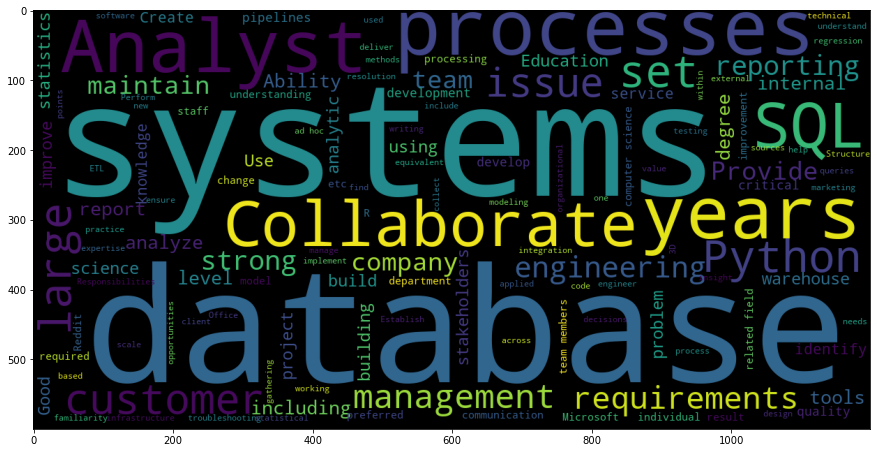

In [31]:
# Not terribly much better. Let's try again with more words filtered
redundant_words.extend(['work', 'support', 'analysis', 'skills', 'product', 'information', 'solutions']) 

# Create the word cloud object
wordcloud = WordCloud(relative_scaling = 0.5, scale = 3, stopwords = redundant_words).generate(full_text)

# Visualize the word cloud
plt.figure(figsize = [15,15])
plt.imshow(wordcloud)
plt.show()

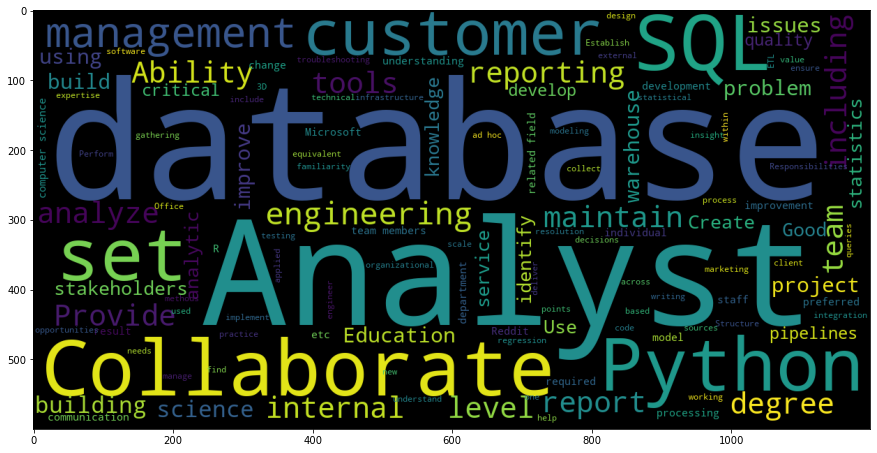

In [32]:
# And last time
redundant_words.extend(['systems', 'processes', 'issue', 'large', 'years', 'company', 'strong', 'requirements'])

# Create the word cloud object
wordcloud = WordCloud(relative_scaling = 0.5, scale = 3, stopwords = redundant_words).generate(full_text)

# Visualize the word cloud
plt.figure(figsize = [15,15])
plt.imshow(wordcloud)
plt.show()

I'm not exactly getting the results I desire. I had hoped to encounter more words and phrases like SQL and Python, which do appear, but each attempt at this word cloud is overwhelmingly dominated by words unspecific to this job domain. To really get a good idea of which skills are required I should probably be more exacting in the parts of the job descriptions I included in the data frame. Better data would result in a better data cloud.